In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [43]:
# Load and Explore the data
train_dir=r"C:\IICET\DEEP_LEARNING_ALGORITHM\glasses\train"
validation_dir=r"C:\IICET\DEEP_LEARNING_ALGORITHM\glasses\validate"

# Cheak the number of images

print(f"Number of glass images in training set:{len(os.listdir(os.path.join(train_dir,'glasses')))}")
print(f"Number of noglass images in training set:{len(os.listdir(os.path.join(train_dir,'noglasses')))}")
print(f"Number of glass images in validation set:{len(os.listdir(os.path.join(validation_dir,'glasses')))}")
print(f"Number of noglass images in validate set:{len(os.listdir(os.path.join(validation_dir,'noglasses')))}")

Number of glass images in training set:52
Number of noglass images in training set:52
Number of glass images in validation set:20
Number of noglass images in validate set:20


Glasses Images:


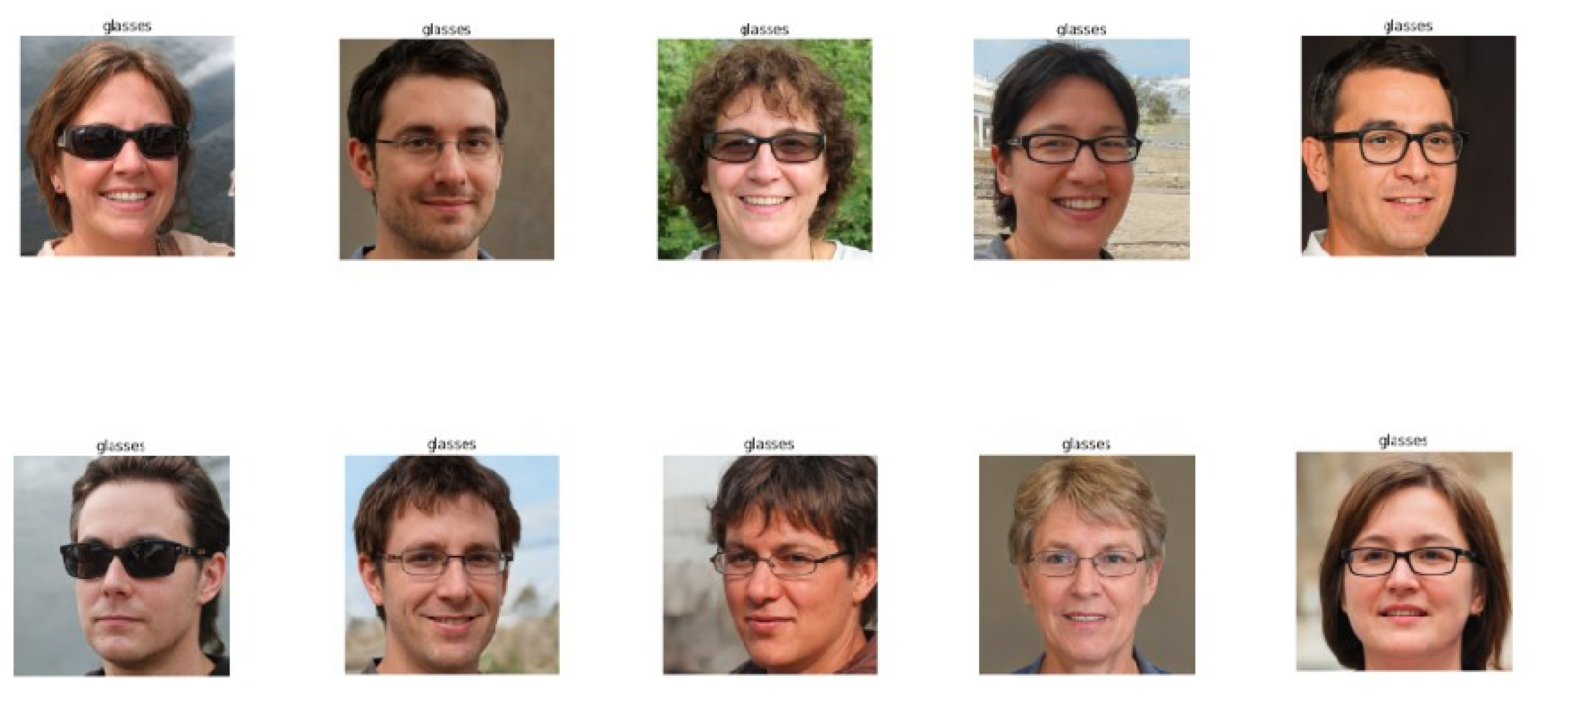

Noglasses Images:


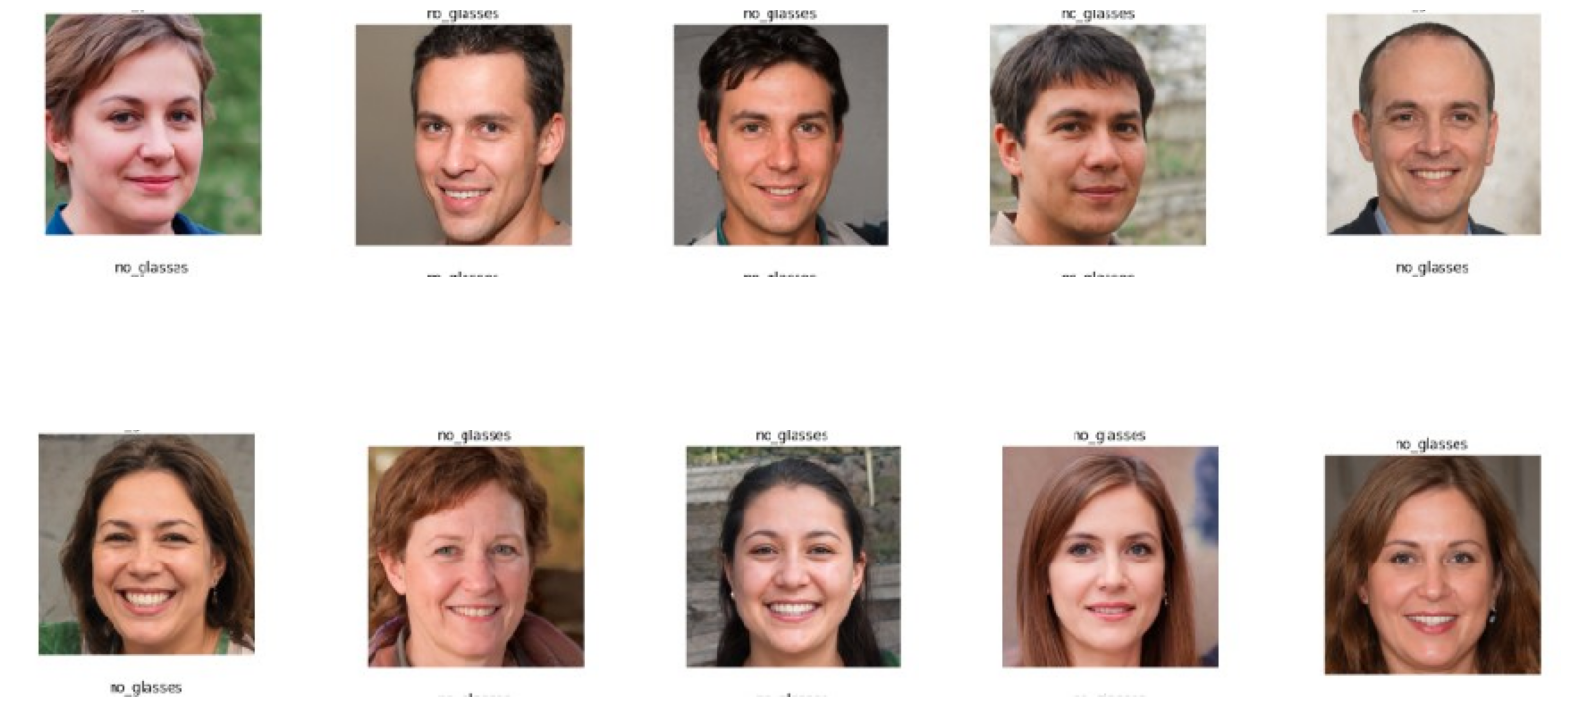

In [44]:
# display sample images
def display_images(class_name, num_images):
    class_dir= os.path.join(train_dir, class_name)
    images=os.listdir(class_dir)
    plt.figure(figsize=(20,10))
    for i in range(num_images):
        plt.subplot(2,5,i+1)
        img=load_img(os.path.join(class_dir, images[i]),target_size=(150,150))
        plt.imshow(img)
        plt.axis('off')
    plt.show()

print("Glasses Images:")
display_images('glasses', 10)

print("Noglasses Images:")
display_images('noglasses', 10)



In [45]:
# Data augmentation and Preprocessing

# Image data generator with data augmentation
train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen= ImageDataGenerator(rescale=1./255)


# Generate training data
train_generator= train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

# Generate test data
test_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)



Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [46]:
model= Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
Dense(512, activation='relu'),
Dense(1,activation='sigmoid')
])

In [47]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
# Train the model
history=model.fit(
    train_generator,
    epochs=200,
    validation_data=test_generator
)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 394ms/step - accuracy: 0.6021 - loss: 0.9548 - val_accuracy: 0.5000 - val_loss: 0.7008
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 457ms/step - accuracy: 0.5417 - loss: 0.7077 - val_accuracy: 0.5000 - val_loss: 0.7016
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 413ms/step - accuracy: 0.5417 - loss: 0.6888 - val_accuracy: 0.5000 - val_loss: 0.6947
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.5208 - loss: 0.6919 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 444ms/step - accuracy: 0.4167 - loss: 0.6978 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.5208 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 483ms/step - accuracy: 0.3500 - loss: 0.6965 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 461ms/step - accuracy: 0.5000 - loss: 0.6937 - val_accuracy: 0.5000 - v

In [40]:
# Evaluate the Model
loss, accuracy= model.evaluate(test_generator)
print(f'Validation Accuracy: {accuracy*100:.2f}%') 
print(f'Validation Loss: {loss}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8042 - loss: 0.3678 
Validation Accuracy: 80.00%
Validation Loss: 0.3637949228286743


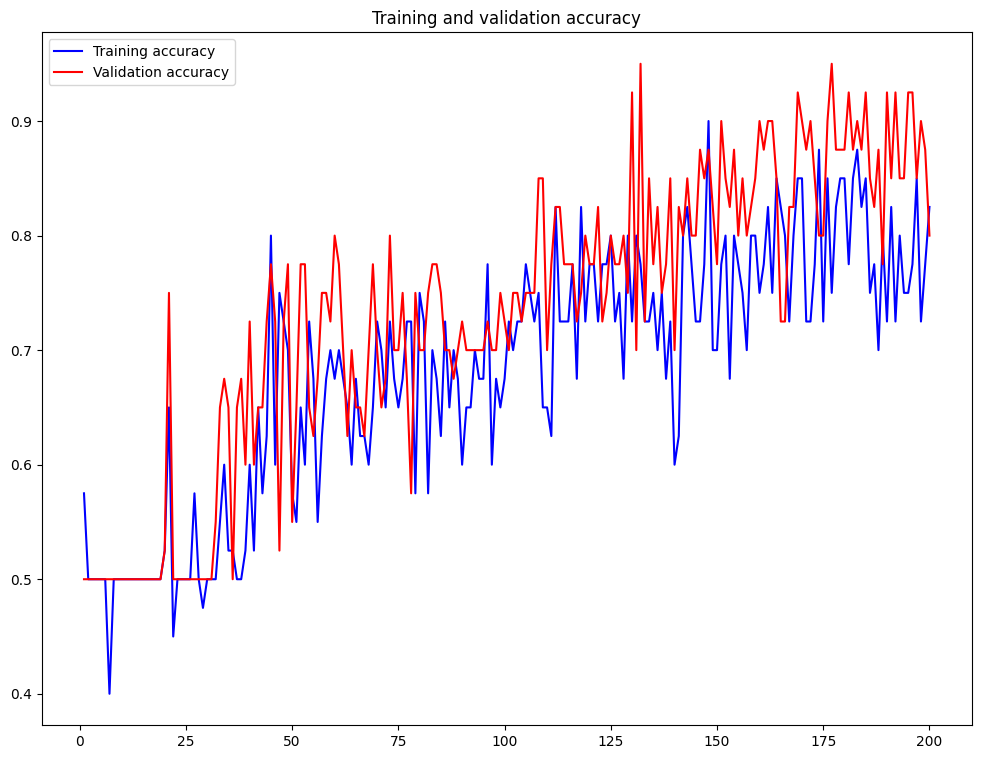

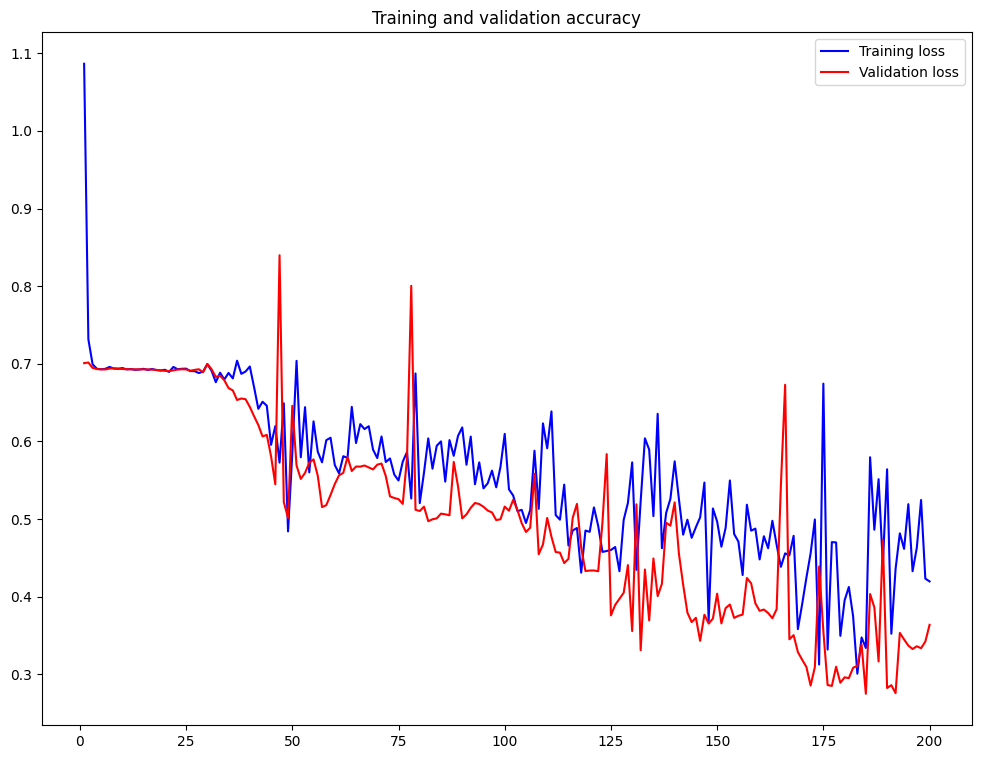

In [41]:
# plot training and validation accuracy and loss
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs= range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()